Lien vers Veille Tech :
https://docs.google.com/document/d/1q6n9m-iSqd-StsmEKDcuAbyZLf_SIY0RGdv-Ledsvxk/edit?usp=sharing

https://www.kaggle.com/datasets/feyzazkefe/trashnet

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import splitfolders
import tensorflow as tf
import keras.layers as tkl
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
import matplotlib.pyplot as plt

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Path to dataset files:", path)

100%|██████████| 40.8M/40.8M [00:45<00:00, 943kB/s] 

Extracting files...


Path to dataset files: /Users/nana/.cache/kagglehub/datasets/feyzazkefe/trashnet/versions/1


In [6]:
trash_classes = os.listdir(path)
print(trash_classes)
# path only goes to one big folder "dataset-resized" / must adjust path
trash_classes_path = os.path.join(path, "dataset-resized")
trash_classes = os.listdir(trash_classes_path)
print(trash_classes)

['.DS_Store', 'dataset-resized']
['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']


In [7]:
# split data into train, validation and test folders
splitfolders.ratio(trash_classes_path,seed=1337, output="trash-Splitted", ratio=(0.7, 0.15, 0.15))

Copying files: 2527 files [00:00, 4690.25 files/s]


In [12]:
# define paths to train, validation and test folders
train_path = 'trash-Splitted/train/'
val_path = 'trash-Splitted/val/'
test_path = 'trash-Splitted/test/'

In [13]:
import random

# Select a few random images to be displayed
images = []
for trash_class in os.listdir(train_path):
  class_path = os.path.join(train_path, trash_class) #define path to each trash_folder
  image_files = os.listdir(class_path) # get all files from trash_folder
  for f in random.sample(image_files,2): #randomly select 2 files in folder
    images.append(os.path.join(class_path, f)) # append file path to list "images"

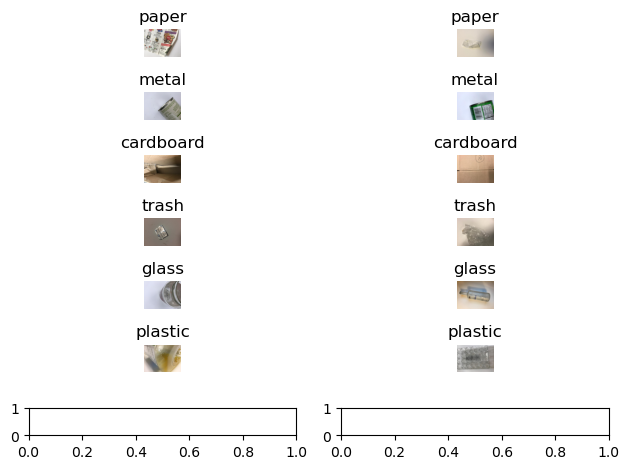

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Display them
fig, axes = plt.subplots(len(trash_classes), 2)
for index, image_path in enumerate(images):
  image = Image.open(image_path)
  ax = axes[index//2, index%2] #positionning images along the axis to not overlap
  ax.imshow(image) #show data as image
  ax.axis('off')  #don't show axis lines
  ax.set_title(os.path.basename(os.path.dirname(image_path))) #get trash type from folder's names

plt.tight_layout()
plt.show()